**Script name:** drc_v1\
**Purpose:** This is version 1 of lithography structures for layout design rule test with the phidl package.\
**Author:** Yanbing Chen\
**Created date:** 10-03-2024\
**Copyright:** Hacker Fab @ Carnegie Mellon University\
**Contact info:** *yanbing2@andrew.cmu.edu*\
**Notes:** Reference: https://phidl.readthedocs.io/en/latest/geometry_reference.html#Lithography-structures

**TODO** 
1. modify image save path and generating process
2. add more testing patterns

In [61]:
from phidl import Device
from phidl import quickplot as qp # Rename "quickplot()" to the easier "qp()"
import phidl.geometry as pg
import phidl.routing as pr


The pg.litho_steps() function creates lithographic test structure that is useful for measuring resolution of photoresist or electron-beam resists. It provides both positive-tone and negative-tone resolution tests.

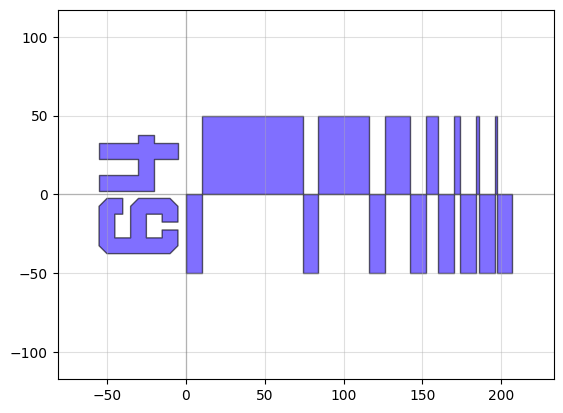

In [62]:
Steps = pg.litho_steps(
        line_widths = [1,2,4,8,16,32,64],
        line_spacing = 10,
        height = 100,
        layer = 1
        )
qp(Steps) # quickplot the geometry


The pg.litho_calipers() function is used to detect offsets in multilayer fabrication. It creates a two sets of notches on different layers. When an fabrication error/offset occurs, it is easy to detect how much the offset is because both center-notches are no longer aligned.

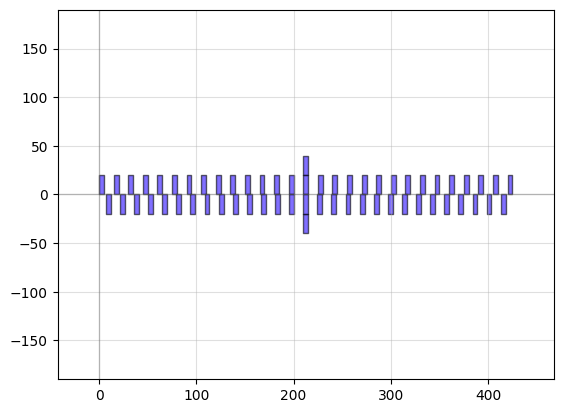

In [63]:
Caliper = pg.litho_calipers(
        notch_size = [5,20],
        notch_spacing = 10,
        num_notches = 14,
        offset_per_notch = 0.5,
        row_spacing = 0,
        layer1 = 1,
        layer2 = 1)
qp(Caliper) # quickplot the geometry

This ruler structure is useful for measuring distances on a wafer. It features customizable ruler markings



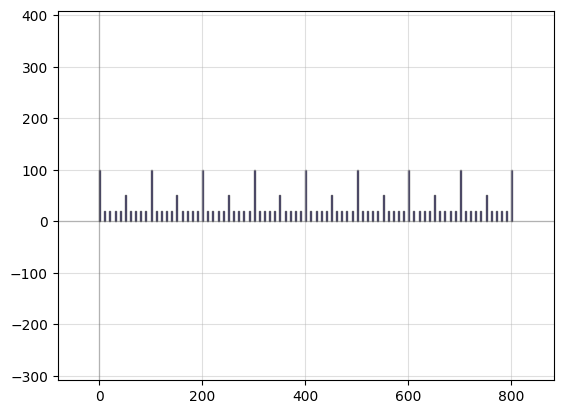

In [64]:
Ruler = pg.litho_ruler(
    height = 20,
    width = 2,
    spacing = 10,
    scale = [5,1,1,1,1,2.5,1,1,1,1],
    num_marks = 81,
    layer = 1,
    )

qp(Ruler)

The route_quad() function creates a direct connection between two ports using a quadrilateral polygon. You can adjust the width of the route at the two ports using the width1 and width2 arguments. If these arguments are set to None, the width of the port is used.


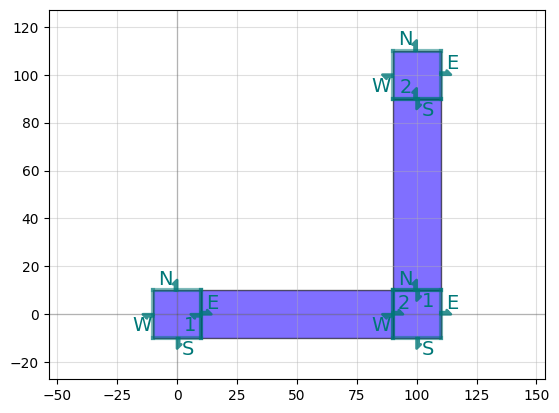

In [65]:
# Use pg.compass() to make 2 boxes with North/South/East/West ports
Box = Device()
c1 = Box << pg.compass(size = [20,20], layer = 1)
c2 = Box << pg.compass(size = [20,20], layer = 1).move([100,0]).rotate(0)
c3 = Box << pg.compass(size = [20,20], layer = 1).move([100,100]).rotate(0)
# Connect the East port of one box to the West port of the other
R1 = Box << pr.route_sharp(c1.ports['E'], c2.ports['W'],
                  width1 = None, width2 = None,  # width = None means use Port width
                  layer = 1)
R2 = Box << pr.route_sharp(c2.ports['N'], c3.ports['S'],
                  width1 = None, width2 = None,  # width = None means use Port width
                  layer = 1)

qp(Box)

pg.import_gds() allows you to easily import external GDSII files. It imports a single cell from the external GDS file and converts it into a PHIDL device.

In [66]:
#D = pg.ellipse()
#D.write_gds('testellipse.gds')
#D = pg.import_gds(filename = 'testellipse.gds', cellname = None, flatten = False)
#qp(D) # quickplot the geometry

## Create Die Box

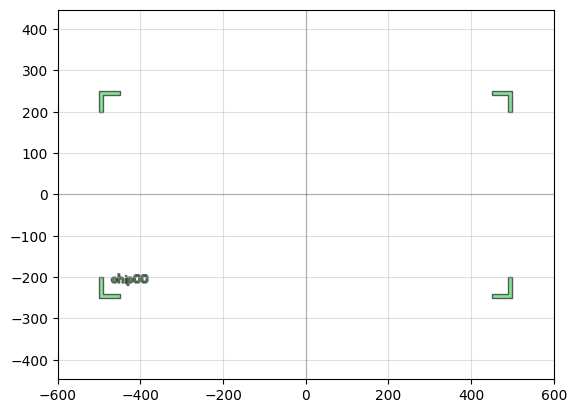

In [67]:
Focus = pg.basic_die(
              size = (1000, 500), # Size of die
              street_width = 10,   # Width of corner marks for die-sawing
              street_length = 50, # Length of corner marks for die-sawing
              die_name = 'chip00',  # Label text
              text_size = 20,      # Label text size
              text_location = 'SW', # Label text compass location e.g. 'S', 'SE', 'SW'
              layer = 0,
              draw_bbox = False,
              bbox_layer = 99,
              )
qp(Focus)
Focus_lyr1 = pg.copy_layer(Focus, layer = 0, new_layer = 1)


## Complete Die View

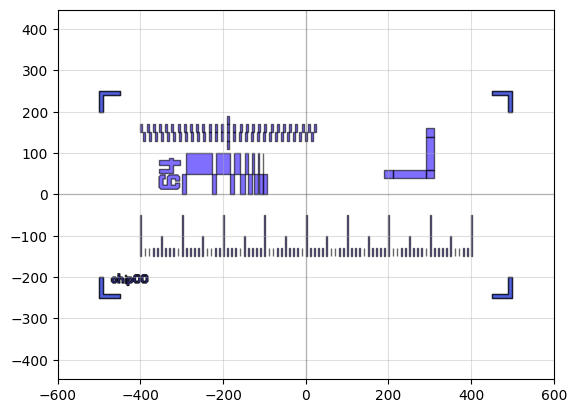

In [68]:
D = pg.Device()

focus_ref = D.add_ref(Focus)
focus_lyr1_ref = D.add_ref(Focus_lyr1)

ruler_ref = D << Ruler.move([-400,-150])
steps_ref = D << Steps.move([-300,50])
caliper_ref = D << Caliper.move([-400,150])
box_ref = D << Box.move([200,50])
qp(D)

In [69]:
#D.write_gds('drc_test_v0.gds')
#D = pg.import_gds(filename = 'drc_test_v0.gds', cellname = None, flatten = False)

## Export patterns on each layer

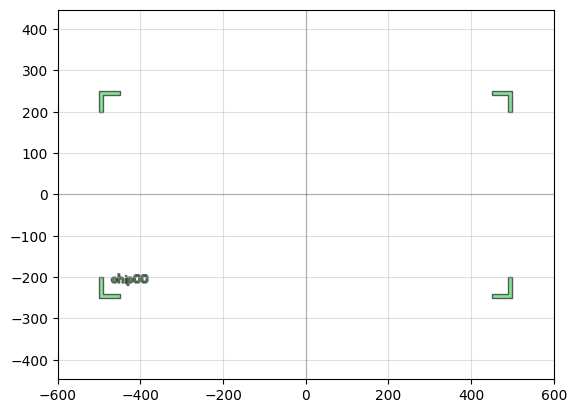

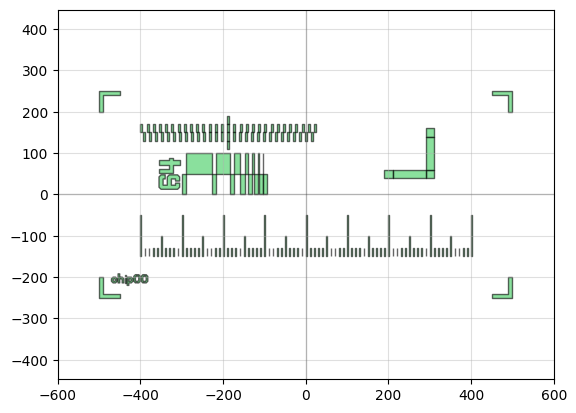

In [70]:
Lyr0 = pg.copy_layer(D, layer = 0, new_layer = 0)
qp(Lyr0)
Lyr1 = pg.copy_layer(D, layer = 1, new_layer = 0)
qp(Lyr1)

#Lyr0.write_svg("drc_test_v0_lyr0.svg", scaling=1, style=None, fontstyle=None, background='#000', pad='5%', precision=None)

imagepath = 'images_v1/'
# Red light
rl_bf_style = {(0, 0): {'fill': 'black','stroke': 'red'}}#{(layer,device):}
rl_bf_background = 'red'
Lyr1.write_svg('images_v1/drc_test_v0_lyr1_bf_rl.svg', style=rl_bf_style,background=rl_bf_background)# bright field

rl_df_style = {(0, 0): {'fill': 'red','stroke': 'black'}}
df_background = 'black'
Lyr1.write_svg('images_v1/drc_test_v0_lyr1_df_rl.svg', style=rl_df_style,background=df_background)# dark field

# UV light
uv_bf_style = {(0, 0): {'fill': 'black','stroke': 'blue'}}
uv_bf_background = 'blue'
Lyr1.write_svg('images_v1/drc_test_v0_lyr1_bf_uv.svg', style=uv_bf_style,background=uv_bf_background)# bright field

uv_df_style =  {(0, 0): {'fill': 'blue','stroke': 'black'}}
Lyr1.write_svg('images_v1/drc_test_v0_lyr1_df_uv.svg', style=uv_df_style,background=df_background)# dark field

# UV focus
uvfocus = {(0, 0): {'fill': 'blue','stroke': 'black'}}
Lyr0.write_svg('images_v1/drc_test_v0_uv_focus.svg', style=uvfocus,background=df_background)# uv focus

